In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,LSTM
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPooling1D, Conv1D, Embedding
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('mail.csv')
df.sample(10, random_state=1)

,label,text
1078,ham,Convey my regards to him
4028,ham,"[‰Û_] anyway, many good evenings to u! s"
958,ham,My sort code is and acc no is . The bank is n...
4642,ham,Sorry i din lock my keypad.
4674,spam,"Hi babe its Chloe, how r u? I was smashed on s..."
5461,ham,Ok i thk i got it. Then u wan me 2 come now or...
4210,ham,Oi when you gonna ring
4216,ham,Will be office around 4 pm. Now i am going hos...
1603,ham,Have you heard about that job? I'm going to th...
1504,ham,Oh my God. I'm almost home


In [3]:
df['label'] = df['label'].map({'ham':0, 'spam':1})

In [4]:
df['text'].values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [5]:
df.loc[df['label']==1].sample(10, random_state=10)

,label,text
1687,1,Free Top ringtone -sub to weekly ringtone-get ...
1535,1,You have won a Nokia 7250i. This is what you g...
1572,1,Ur cash-balance is currently 500 pounds - to m...
2710,1,Hope you enjoyed your new content. text stop t...
2472,1,Final Chance! Claim ur å£150 worth of discount...
1047,1,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
2132,1,Your B4U voucher w/c 27/03 is MARSMS. Log onto...
5189,1,ree entry in 2 a weekly comp for a chance to w...
4375,1,"If you don't, your prize will go to another cu..."
3862,1,Oh my god! I've found your number again! I'm s...


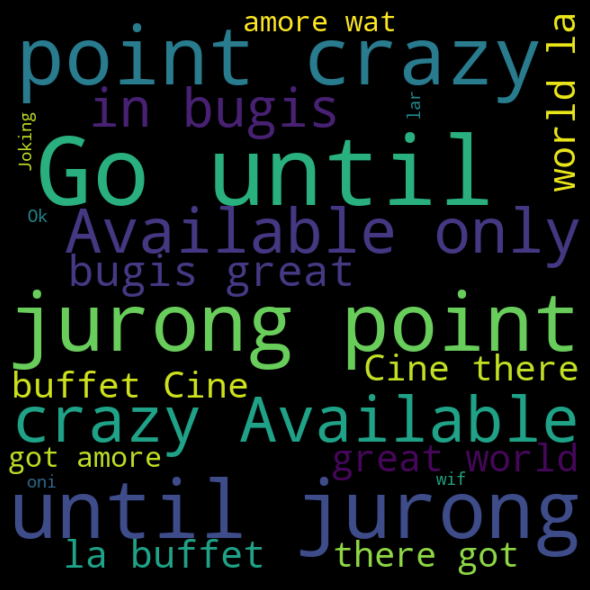

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
question = df['text'].loc[df['label']].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(question))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')    
plt.tight_layout(pad=0)
plt.show()
    


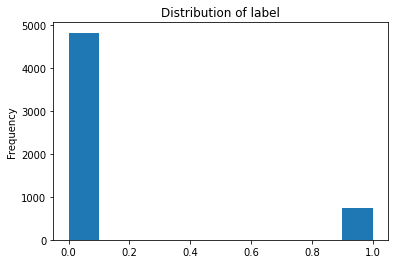

In [7]:
#Plot Frequency of question categoru
df['label'].plot(kind='hist', title='Distribution of label')

In [8]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [9]:
from keras import utils as np_utils
x=df['text'].values
y=df['label'].values


Using TensorFlow backend.


In [10]:
max_features = 2000
max_text_length = 400
embedding_dims =50

In [11]:
x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [12]:

model = Sequential([
    Embedding(max_features,  embedding_dims, input_length=max_text_length),

    Conv1D(250,3,padding='valid',activation='relu'),
    Dropout(0.2),
    MaxPooling1D(),
    
    Conv1D(250,3,padding='valid',activation='relu'),
    Dropout(0.2),
    GlobalMaxPooling1D(),
    
    Dense(250, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')   
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 50)           100000    
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          37750     
_________________________________________________________________
dropout (Dropout)            (None, 398, 250)          0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 199, 250)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 197, 250)          187750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 197, 250)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x_train_val,y,test_size=.2,random_state=42)

In [20]:
history=model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=3,batch_size=32,verbose=1)

Train on 4457 samples, validate on 1115 samples
Epoch 1/3
4457/4457 [==============================] - 413s 93ms/sample - loss: 0.1624 - accuracy: 0.9401 - val_loss: 0.1409 - val_accuracy: 0.9614
Epoch 2/3
4457/4457 [==============================] - 385s 86ms/sample - loss: 0.0559 - accuracy: 0.9838 - val_loss: 0.0582 - val_accuracy: 0.9839
Epoch 3/3
4457/4457 [==============================] - 391s 88ms/sample - loss: 0.0328 - accuracy: 0.9899 - val_loss: 0.0561 - val_accuracy: 0.9839


In [21]:

model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=max_text_length))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

model.fit(x_train,y_train, batch_size=500, epochs=3, verbose=1, validation_split=0.2, shuffle=True)


Train on 3565 samples, validate on 892 samples
Epoch 1/3
3565/3565 [==============================] - 173s 48ms/sample - loss: 0.5281 - accuracy: 0.8180 - val_loss: 0.3890 - val_accuracy: 0.8621
Epoch 2/3
3565/3565 [==============================] - 142s 40ms/sample - loss: 0.3555 - accuracy: 0.8670 - val_loss: 0.2948 - val_accuracy: 0.8621
Epoch 3/3
3565/3565 [==============================] - 150s 42ms/sample - loss: 0.2631 - accuracy: 0.8940 - val_loss: 0.2201 - val_accuracy: 0.8744


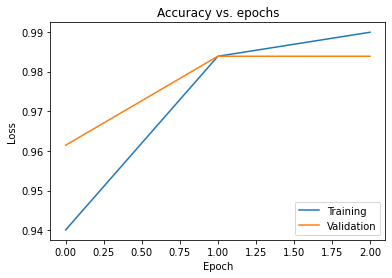

In [22]:
# Run this cell to plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

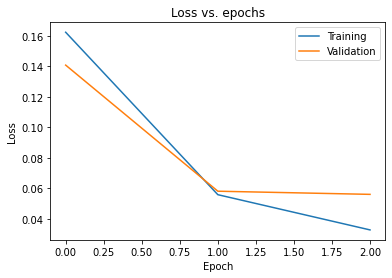

In [23]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 